In [55]:
from keras.datasets import boston_housing
import numpy as np
import pandas as pd
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

In [30]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [31]:
test_data

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [33]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [34]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [35]:
my_np_array = np.array(train_targets)

In [36]:
df_target = pd.DataFrame(my_np_array)

In [37]:
df_target.describe()

,0
count,404.000000
mean,22.395050
std,9.210442
min,5.000000
25%,16.675000
50%,20.750000
75%,24.800000
max,50.000000


## Manually Normalization

In [38]:
mean = train_data.mean(axis=0)

In [39]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [40]:
train_data-=mean

In [41]:
std = train_data.std(axis=0)

In [42]:
train_data/=std

In [43]:
test_data-=mean

In [44]:
test_data/=std

In [45]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

## Normalization using MinMaxScaler()

In [46]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [49]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(train_data)

# Normalize the training data
train_data_normalized = scaler.transform(train_data)

# Normalize the test data using the same scaler
test_data_normalized = scaler.transform(test_data)

In [50]:
# Print the normalized data
print(train_data_normalized)

[[1.37816304e-02 0.00000000e+00 2.81524927e-01 ... 8.93617021e-01
  1.00000000e+00 4.68818985e-01]
 [1.73654275e-04 8.25000000e-01 5.75513196e-02 ... 2.23404255e-01
  9.96167230e-01 3.80794702e-02]
 [5.49837765e-02 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  9.46089061e-01 4.22185430e-02]
 ...
 [3.18534767e-04 3.50000000e-01 2.05278592e-01 ... 4.57446809e-01
  9.12627969e-01 1.68322296e-01]
 [2.40852297e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  6.59715568e-01 3.87969095e-01]
 [9.07048543e-05 6.00000000e-01 9.05425220e-02 ... 3.19148936e-01
  9.49064501e-01 7.31236203e-02]]


In [51]:
print(test_data_normalized)

[[2.03195508e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  6.79055928e-02 7.53863135e-01]
 [1.31471460e-03 0.00000000e+00 3.50073314e-01 ... 5.53191489e-01
  9.95082959e-01 3.99558499e-01]
 [5.46814270e-04 0.00000000e+00 1.73387097e-01 ... 8.08510638e-01
  1.00000000e+00 2.21026490e-01]
 ...
 [2.05400974e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  9.81617832e-01 5.24282561e-03]
 [3.95380999e-03 0.00000000e+00 2.10410557e-01 ... 5.10638298e-01
  9.86887891e-01 2.20198675e-01]
 [3.27940197e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  6.04770790e-01 2.22958057e-01]]


In [52]:
train_data_normalized.shape

(404, 13)

## Building the Model

In [54]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data_normalized.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])
    return model

### K-fold CrossValidation

In [57]:
# Define the number of folds
k = 4

# Initialize lists to store the evaluation scores
all_mae_scores = []

# Perform k-fold cross-validation
kfold = KFold(n_splits = k)

for train_index, val_index in kfold.split(train_data_normalized):
    # Split the data into training and validation sets
    partial_train_data, val_data = train_data_normalized[train_index], train_data_normalized[val_index]
    partial_train_targets, val_targets = train_targets[train_index], train_targets[val_index]

    # Build the model
    model = build_model()

    # Train the model
    history = model.fit(partial_train_data, partial_train_targets, epochs=100, batch_size=1, verbose=0,
                        validation_data=(val_data, val_targets))

    # Get the MAE from the history object
    val_mae = history.history['val_mae']

    # Store the evaluation score
    all_mae_scores.append(val_mae)

In [58]:
# Compute the mean of the evaluation scores
mean_mae = np.mean(all_mae_scores)
print("Mean MAE:", mean_mae)

Mean MAE: 2.828928308188915


## Try with 500 epochs

In [59]:
# Define the number of folds
k = 4

# Initialize lists to store the evaluation scores
all_mae_histories = []

# Perform k-fold cross-validation
kfold = KFold(n_splits=k)
for train_index, val_index in kfold.split(train_data_normalized):
    # Split the data into training and validation sets
    partial_train_data, val_data = train_data_normalized[train_index], train_data_normalized[val_index]
    partial_train_targets, val_targets = train_targets[train_index], train_targets[val_index]

    # Build the model
    model = build_model()

    # Train the model
    history = model.fit(partial_train_data, partial_train_targets, epochs=500, batch_size=1, verbose=0,
                        validation_data=(val_data, val_targets))

    # Get the MAE scores for each epoch
    val_mae_history = history.history['val_mae']

    # Store the MAE scores for this fold
    all_mae_histories.append(val_mae_history)

In [60]:
# Compute the average MAE score for each epoch across all folds
average_mae_history = np.mean(all_mae_histories, axis=0)

print("Average MAE Scores for Each Epoch:")
print(average_mae_history)

Average MAE Scores for Each Epoch:
[6.80689299 5.3136133  4.9233247  4.53816777 4.37994432 4.15035248
 3.8266747  3.63952219 3.74362409 3.40894288 3.29493934 3.51894474
 3.23411298 3.23952907 3.2128588  3.14536852 3.14204377 3.05162615
 3.20934433 2.97394449 3.09296948 2.90551281 2.94332343 2.97623324
 2.97418725 2.83852482 2.89726365 3.03225857 2.8545078  2.63229793
 2.72902215 2.65972924 2.60914689 2.69559652 2.87478775 2.77057934
 2.68632072 2.53688592 2.51791799 2.58254659 2.48746204 2.54521823
 2.57698226 2.56879419 2.58442241 2.5604412  2.66566783 2.48531801
 2.4291653  2.63801444 2.5910877  2.65823591 2.46215492 2.42949224
 2.63008326 2.4321391  2.43103731 2.42283016 2.5564574  2.80141515
 2.46038604 2.46785879 2.48368257 2.36366135 2.49440151 2.3796919
 2.43185753 2.53896594 2.35533553 2.49327129 2.3981306  2.42201465
 2.38925248 2.36586392 2.48943555 2.30560195 2.37444973 2.34823895
 2.33440524 2.33856422 2.40365338 2.43405861 2.41567698 2.34090418
 2.33631355 2.39569086 2.667

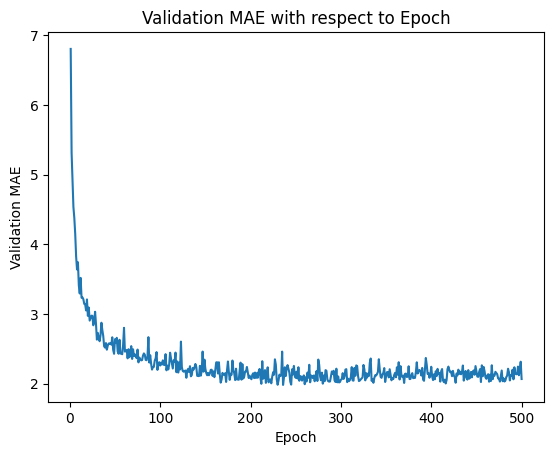

In [61]:
# Plot the validation MAE scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE with respect to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.show()

### Smothing the Curve

In [106]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

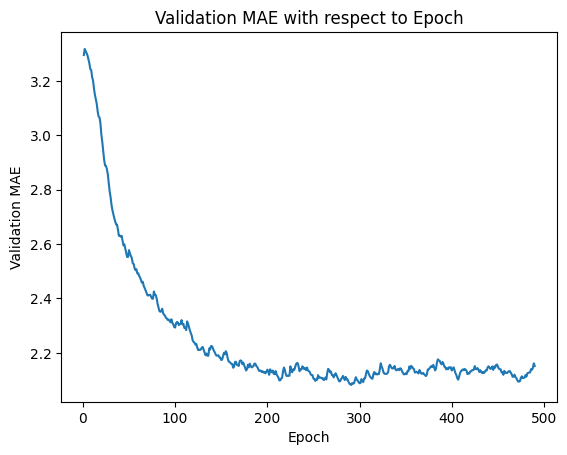

In [107]:
plt.clf()
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.title('Validation MAE with respect to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.show()

### Training the Final Model

From the above graph we can see that the Validation MAE is loawest at the epoch number of around 295, so we we use the number of epochs as 295 in our final model.

In [100]:
model = build_model()
model.fit(train_data, train_targets, epochs= 295, batch_size=16, verbose=0)

In [101]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 22.7490 - mae: 3.4278
